# Analysis of Heart Disease & risk of Atherosclerotic Cardiovascular Disease

"""
Created on Fri Dec  3 22:09:11 2021
@author: Eva Cheng - DMF Student 2021 - 2022
"""

Heart failures are the most common cause of death in the world and some factors may increase the cause of heart disease. Among the factors, the most known are diabete, the age of the person, hypertension, etc. One can wonder whether the assumptions are true and which factors are the most relevant to analyze the risk of Heart failure. For this analysis I will use two datasets provided by Kaggle, one will be about the risk of ASCVD according to many factors and the other one is about the heart failure.
Links to the datasets : 
- ASCVD RISK : https://www.kaggle.com/mokar2001/ascvd-heart-risk
- Heart Disease Prediction : https://www.kaggle.com/fedesoriano/heart-failure-prediction

## 1. Presentation of the datasets without coding anything and the guidelines
### a. ASCVD risk
This dataset reports the risk of having an ASCVD according to the following variables : The sex, the ethnicity, whether the person smokes, whether the person is diabetic, their age, their maximum blood pressure, their cholesterol and their HDL cholesterol. Since I am not a med student, I will not go into the detail of everything, but the provider of this dataset has chosen to make the variables either float or integer and it will change during the analysis.

### b. Heart disease prediction 
This dataset report whether the person (observation) has a heart disease according to their gender, age, the type of chest pain they have, their resting blood pressure, their cholesterol, their fasting blood sugar (diabete), their resting ECG, maximum heart rate, exercise of angina, their oldpeak, the slope of their peak exercise.

### c. Guidelines of the analysis
I will first clean the datasets, then I will show an overview of the two data sets, afterwards I will analyze the datasets one by one and try to figure out some common conclusions. Finally I try to add other features to my analysis thanks to machine learning. 

## 2. Let's clean the datasets and import some libraries

### a. Import the libraries and the datasets
I will be using os in order to facilitate the path to the file and the datasets to be imported, pandas is meant to be used for the creation of dataframes, warnings library will be used to suppress the warning messages, matplotlib.pyplot and seaborn are used for show some nice graphs and sklearn are useful for machine learning.

In [68]:
# Importing the libraries, modules and extentions  
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import tree
import PySimpleGUI as sg
import numpy as np

Afterwards, I can import the datasets and set the current working directory so the user do not need to change it everytime and to write the absolute directory everytime.

In [2]:
# Eliminating the waring messages 
warnings.filterwarnings("ignore")
# This line of code helps the user setting the current directory (so they don't have to write the whole directory everytime)
os.chdir("C:/Users/33652/Desktop/Git_repo_LOCAL/Python_HeartDisease_Analysis")

# Importation of the dataset zone
heart_diseases_data = pd.read_csv("datasets/heart.csv", encoding="ISO-8859-1")
ascvd_data = pd.read_csv("datasets/heartRisk.csv", encoding="ISO-8859-1")

### b. Cleaning the datasets
This step is meant to make the datasets more readable for the user and to suppress the records that may hinder the data analysis (for example NaN values or missing values).

In [3]:
# Dropping the rows with missing values 
heart_diseases_data.dropna(inplace = True)
ascvd_data.dropna(inplace = True)

# Reformatting the ascvd dataset so it becomes more readable for the user, the first one is fine 
# And renaming the variables to better understand their meaning
clean_ascvd = ascvd_data[['Age','Cholesterol','HDL','Risk']]
clean_ascvd['Gender'] = ascvd_data['isMale'].replace({0: "Female", 1: "Male"}, inplace=False)
clean_ascvd['Smoker'] = ascvd_data['isSmoker'].replace({0: "No", 1: "Yes"}, inplace=False)
clean_ascvd['Diabete'] = ascvd_data['isDiabetic'].replace({0: "Not Diabetic", 1: "Diabetic"}, inplace=False)
clean_ascvd['Tension'] = ascvd_data['isHypertensive'].replace({0: "Normal", 1: "Hypertension"}, inplace=False)
clean_ascvd['Blood_Pressure'] = ascvd_data['Systolic']
# Putting in a order that seems to be more logical
clean_ascvd = clean_ascvd[['Age','Gender','Smoker','Diabete','Tension','Blood_Pressure','Cholesterol','HDL','Risk']]

Since the datasets are clean, I can start my analysis. In class we basically covered how to create some nice plots, how to format the data, how to explore the data with pandas conditions, how to extract information and use aggregate functions (mean, count, sum) and visualize the data. I will go through as much things we covered as the datasets allow me.

## 3. General exploration phase
This step is meant to show an overview of the dataset to the user, the relationship between the variables and the values they can observe in the datasets (mean, count, different values...).

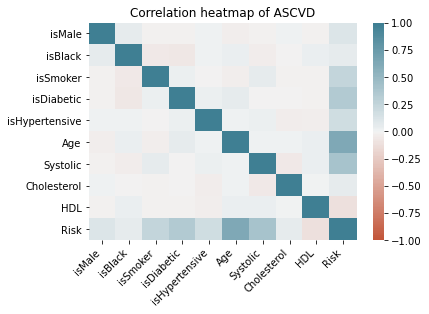

In [4]:
# Let's start by showing some correlation matrix to see the link between the variables 
# I will start with the ASCVD dataset, and it is better to show the correlation matrix of the original dataset.
plt.clf()
correlation_1 = ascvd_data.corr()
ax_1 = sns.heatmap(correlation_1, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))
ax_1.set_xticklabels(ax_1.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Correlation heatmap of ASCVD")
plt.show()

In [74]:
# Create a pivot table to see the percentage of men and women smoking and having diabete
diabete_smoke_gender = pd.pivot_table(ascvd_data[['isMale', 'isSmoker','isDiabetic']], 
                                       values=['isDiabetic'],columns=['isMale'], index=['isSmoker'])
print(diabete_smoke_gender)

         isDiabetic          
isMale            0         1
isSmoker                     
0          0.518672  0.497942
1          0.539033  0.530364


The portion of women being diabetic is bigger than the portion of man being diabetic and the value of being diabetic is increased when the person is a smoker.

From what we can observe, we can say that the variables that are relevant for the analysis are the gender, whether they smoke, whether they are diabetic, the age and the high blood pressure because they have a strong correlation with the variable risk, so it mean, they will have a higher impact on the risk.

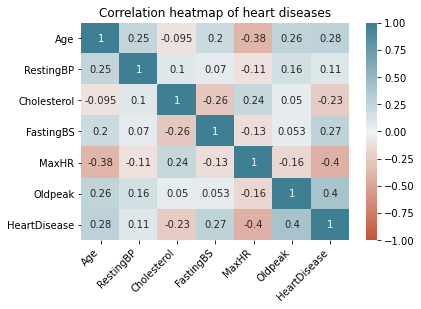

In [5]:
# We have to make sure that the plots are cleared every time and showed every time
# Let's do the correlation plot of the heart disease dataset
plt.clf()
correlation_2 = heart_diseases_data.corr()
# Correlation plot with a heatmap by using seaborn, and I choosed to annotate this one to support my analysis
ax_2 = sns.heatmap(correlation_2, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot=True)
ax_2.set_xticklabels(ax_2.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Correlation heatmap of heart diseases")
plt.show()

The variables here are somehow different from the previous ones, but some variables remain in the dataset, for example the age, the cholesterol, the fasting blood sugar (diabete). The variables that should be taken in account are the age, the blood sugar, the old peak, the maximum heart rate. The common variables with the previous dataset are the bloodsugar and the age.

In [73]:
# Create a pivot table to see the percentage of heart disease among men and women
diabete_heart_disease = pd.pivot_table(heart_diseases_data[['FastingBS', 'HeartDisease','Sex']], 
                                       values=['HeartDisease'],columns=['Sex'], index=['FastingBS'])
print(diabete_heart_disease)

          HeartDisease          
Sex                  F         M
FastingBS                       
0             0.203593  0.566108
1             0.615385  0.819149


As we can say, the percentage of person having a heart disease being a man with diabete is 82%, whereas it is 62% for woman and the numbers are lower when the person does not have diabete. Therefore, we can say that the probability of having a heart disease increases with fasting blood sugar.

We will now have an overview of the different datasets (the structure, the type of data that are present, the statistics about the dataset (mean, count, quantiles etc).

In [6]:
print("\n# You can see the first 5 lines if the Heart disease dataset :")
print(heart_diseases_data.head())
print("\n# The following table will show the different type of data the variables hold :")
print(heart_diseases_data.info())
print("\n# The following table will give some statistical description about the data :")
print(heart_diseases_data.describe())


# You can see the first 5 lines if the Heart disease dataset :
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

# The following table will show the different type of data the variables hold :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries,

As mentionned in the first part, this is the structure of the dataset, the dataset is well distributed because the mean of heart disease is pretty much 0.5 (50%) and the standard deviation is almost 0.5. which mean that the heart disease variable is well distributed (half of the people have heart disease).

In [7]:
# Risk of Atherosclerotic cardiovascular disease
print("\n# You can see the first 5 lines if the ASCVD dataset :")
print(clean_ascvd.head())
print("\n# The following table will show the different type of data the variables hold :")
print(clean_ascvd.info())
print("\n# The following table will give some statistical description about the data :")
print(clean_ascvd.describe())


# You can see the first 5 lines if the ASCVD dataset :
   Age  Gender Smoker       Diabete       Tension  Blood_Pressure  \
0   49    Male     No      Diabetic  Hypertension             101   
1   69  Female     No      Diabetic  Hypertension             167   
2   50  Female    Yes      Diabetic  Hypertension             181   
3   42    Male    Yes      Diabetic        Normal             145   
4   66  Female    Yes  Not Diabetic  Hypertension             134   

   Cholesterol  HDL  Risk  
0          181   32  11.1  
1          155   59  30.1  
2          147   59  37.6  
3          166   46  13.2  
4          199   63  15.1  

# The following table will show the different type of data the variables hold :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1000 non-null   int64  
 1   Gender          1000 non-null   obj

This gives an overview of the dataset to the user, the dataset has already been presented to the user previously in the first part and these results only give the user a concrete overview about the things mentionned.

## 4. Exploring the Risk of ASCVD dataset 
The analysis will be separated for men and women, the idea here is to find how the different factors can lead to a higher risk of ASCVD and how to show visual information to the user.

In [8]:
# Let's keep the relevant variables only (strong correlation or anticorrelation)
# meaning that we should eliminate ethnicity, cholesterol, HDL because of the correlation plot we saw earlier
relevant_ascvd = clean_ascvd[['Gender','Age','Smoker','Diabete','Blood_Pressure','Risk']]
print("\nFor my analysis, I will use this dataset :")
print(relevant_ascvd.head())
print("\nThe statistics of this dataset are the following :")
print(relevant_ascvd.describe())


For my analysis, I will use this dataset :
   Gender  Age Smoker       Diabete  Blood_Pressure  Risk
0    Male   49     No      Diabetic             101  11.1
1  Female   69     No      Diabetic             167  30.1
2  Female   50    Yes      Diabetic             181  37.6
3    Male   42    Yes      Diabetic             145  13.2
4  Female   66    Yes  Not Diabetic             134  15.1

The statistics of this dataset are the following :
               Age  Blood_Pressure         Risk
count  1000.000000     1000.000000  1000.000000
mean     59.107000      144.249000    19.667000
std      11.536492       31.774528    17.043941
min      40.000000       90.000000     0.100000
25%      49.000000      117.000000     6.300000
50%      59.000000      144.000000    14.400000
75%      69.000000      171.000000    29.000000
max      79.000000      200.000000    85.400000


Since the correlation between the age and the risk / having diabete and the risk is high, let's show a marginal histogram and see if there is any relationship between the variables or any clusters that can support the conclusions.

<Figure size 432x288 with 0 Axes>

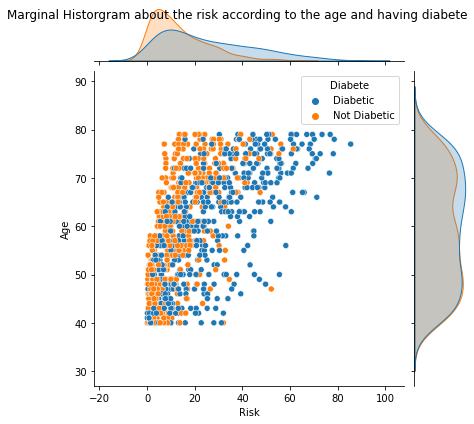

In [9]:
# Try to do marginal histogram to see distribution according to the age, the risk, having diabete or not
plt.clf()
sns.jointplot(x="Risk", y="Age", data=relevant_ascvd, hue='Diabete')
plt.xlabel("Risk of ASCVD in percentage")
plt.ylabel("Age in years")
plt.title("Marginal Historgram about the risk according to the age and having diabete", y=1.15,loc='right')
plt.show()

From what we can see, we can say that the there are more orange point in the left and blue in the right, so having diabete increases the risk of ASCVD and the points get closer to the right when the age is higher so we can say that according to this plot, the risk of ASCVD is increased by the age and the fact of having diabete. Let's do a more detailed analysis !

In [10]:
# Let's separate the dataset according to gender to analyze them separately
female_ascvd = relevant_ascvd[relevant_ascvd['Gender']=='Female']
male_ascvd = relevant_ascvd[relevant_ascvd['Gender']=='Male']

# Evaluate the average risk according to the age of the patient because we have a lot of record
female_ascvd_age_risk = female_ascvd.groupby(['Age']).mean()['Risk']
male_ascvd_age_risk = male_ascvd.groupby(['Age']).mean()['Risk']

We can create a line plot to see the trend and to see if there is any difference between men and women regarding the risk of ASCVD and if being a man or a women can affect the result.

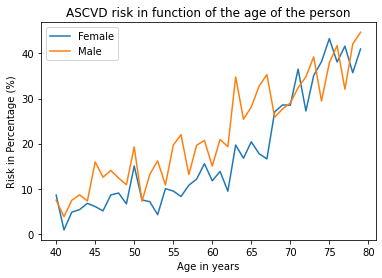

In [11]:
# Creating a line plot showing the risk according to the age for eah gender to compare the trend of the two
plt.clf()
plt.plot(female_ascvd_age_risk, label = "Female")
plt.plot(male_ascvd_age_risk, label = "Male")
plt.legend()
plt.title("ASCVD risk in function of the age of the person")
plt.xlabel("Age in years")
plt.ylabel("Risk in Percentage (%)")
plt.show()

We can say that according to this plot, men have a higher tendency to have a higher risk of ASCVD compared to women and for the two groups there is an upward trend (the risk becomes higher when people get older).

In [12]:
print("The average risk of ASCVD for women in our observation sample is : ", str(round(female_ascvd['Risk'].mean(),2))) 
print("The average risk of ASCVD for men in our observation sample is : ", str(round(male_ascvd['Risk'].mean(),2))) 

The average risk of ASCVD for women in our observation sample is :  17.77
The average risk of ASCVD for men in our observation sample is :  21.64


The average risk of ASCVD for men is slightly higher than for women so it can be a good practice to separate them while analyzing the data.

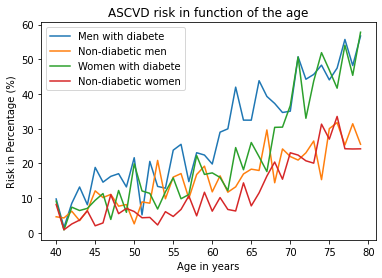

In [13]:
# Let's evaluate the risk according to variables that have great correlation (smoking, diabete, age, systolic)
male_ascvd_diabete = male_ascvd[male_ascvd['Diabete']=='Diabetic']
male_ascvd_non_diabete = male_ascvd[male_ascvd['Diabete']!='Diabetic']
female_ascvd_diabete = female_ascvd[female_ascvd['Diabete']=='Diabetic']
female_ascvd_non_diabete = female_ascvd[female_ascvd['Diabete']!='Diabetic']

# Show the relationship between the age and the risk of the ASCVD
plt.clf()
plt.plot(male_ascvd_diabete.groupby(['Age']).mean()['Risk'], label = 'Men with diabete')
plt.plot(male_ascvd_non_diabete.groupby(['Age']).mean()['Risk'], label = 'Non-diabetic men')
plt.plot(female_ascvd_diabete.groupby(['Age']).mean()['Risk'], label = 'Women with diabete')
plt.plot(female_ascvd_non_diabete.groupby(['Age']).mean()['Risk'], label = 'Non-diabetic women')
plt.legend()
plt.title("ASCVD risk in function of the age")
plt.xlabel("Age in years")
plt.ylabel("Risk in Percentage (%)")
plt.show()

We can say that the risk of ASCVD is higher when the patient has diabete and the gap is even bigger when i comes to man and the risk is increased too. The gap between non diabetic and diabetic men is bigger than the one between the diabetic and non diabetic women. Therefore the gender can be a big factor of risk.

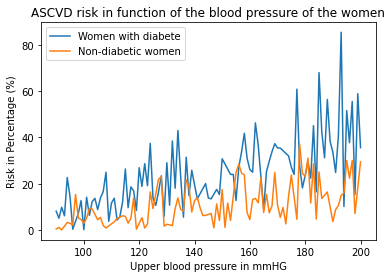

In [14]:
# Let's plot a graph showing the relationship between the blood pressure and the risk
plt.clf()
plt.plot(female_ascvd_diabete.groupby(['Blood_Pressure']).mean()['Risk'], label = 'Women with diabete')
plt.plot(female_ascvd_non_diabete.groupby(['Blood_Pressure']).mean()['Risk'], label = 'Non-diabetic women')
plt.legend()
plt.title("ASCVD risk in function of the blood pressure of the women")
plt.xlabel("Upper blood pressure in mmHG")
plt.ylabel("Risk in Percentage (%)")
plt.show()

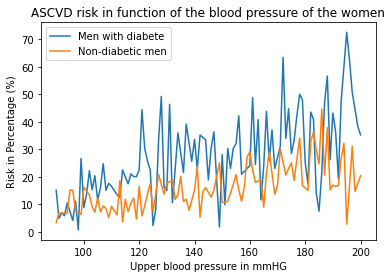

In [15]:
# Let's plot a graph showing the relationship between the blood pressure and the risk
plt.clf()
plt.plot(male_ascvd_diabete.groupby(['Blood_Pressure']).mean()['Risk'], label = 'Men with diabete')
plt.plot(male_ascvd_non_diabete.groupby(['Blood_Pressure']).mean()['Risk'], label = 'Non-diabetic men')
plt.legend()
plt.title("ASCVD risk in function of the blood pressure of the women")
plt.xlabel("Upper blood pressure in mmHG")
plt.ylabel("Risk in Percentage (%)")
plt.show()

In conclusion, the blood pressure is not a strong determinant factor of risk compared to the age and the fact of having diabete, of course, it increases the variations, and the trend is slightly upward. 

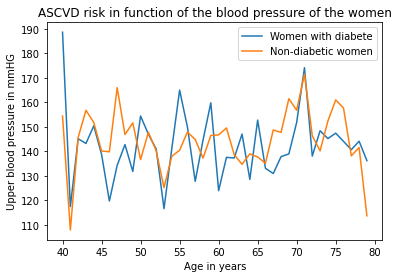


The following dataset indicates the statistics of men with diabete
              Age  Blood_Pressure        Risk
count  252.000000      252.000000  252.000000
mean    59.055556      144.416667   27.614286
std     11.847508       31.723108   18.729399
min     40.000000       90.000000    0.700000
25%     48.000000      117.000000   11.975000
50%     59.000000      145.000000   23.900000
75%     69.000000      171.250000   41.975000
max     79.000000      200.000000   76.800000

The following dataset indicates the statistics of men without diabete
              Age  Blood_Pressure        Risk
count  238.000000      238.000000  238.000000
mean    58.567227      142.844538   15.315126
std     11.748853       30.418408   11.459241
min     40.000000       90.000000    0.300000
25%     48.000000      118.000000    7.250000
50%     59.000000      138.000000   12.750000
75%     69.000000      169.000000   21.250000
max     79.000000      200.000000   61.300000


In [16]:
# Let's see if there is any relationship between the age and the blood pressure 
# (if there is, the previous graph is non relevant)
plt.clf()
plt.plot(female_ascvd_diabete.groupby(['Age']).mean()['Blood_Pressure'], label = 'Women with diabete')
plt.plot(female_ascvd_non_diabete.groupby(['Age']).mean()['Blood_Pressure'], label = 'Non-diabetic women')
plt.legend()
plt.title("ASCVD risk in function of the blood pressure of the women")
plt.xlabel("Age in years")
plt.ylabel("Upper blood pressure in mmHG")
plt.show()

# Let's check if there is a correlation between having diabete and having high blood pressure
print("\nThe following dataset indicates the statistics of men with diabete")
print(male_ascvd_diabete.describe())
print("\nThe following dataset indicates the statistics of men without diabete")
print(male_ascvd_non_diabete.describe())

We can see that there is not relationship / correlation between the two variables therefore, the two variables bring different pieces of information by themselves so we can consider the two of them. From the table shown for the men, we can also say that there is no relationship between being diabetic and having a high / low blood pressure because the mean and the standard deviation are almost the same. 

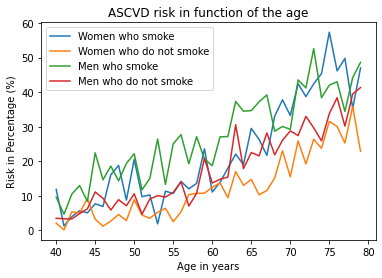

In [17]:
# Try to do some analysis for people who are smoking (separately from diabetic, the two factors will be combined later)
female_ascvd_smoke = female_ascvd[female_ascvd['Smoker']=='Yes']
female_ascvd_non_smoke = female_ascvd[female_ascvd['Smoker']=='No']
male_ascvd_smoke = male_ascvd[male_ascvd['Smoker']=='Yes']
male_ascvd_non_smoke = male_ascvd[male_ascvd['Smoker']=='No']

# Show the relationship between the age and the risk of the ASCVD, we use the groupby function, because we have many values for the 
plt.clf()
plt.plot(female_ascvd_smoke.groupby(['Age']).mean()['Risk'], label = 'Women who smoke')
plt.plot(female_ascvd_non_smoke.groupby(['Age']).mean()['Risk'], label = 'Women who do not smoke')
plt.plot(male_ascvd_smoke.groupby(['Age']).mean()['Risk'], label = 'Men who smoke')
plt.plot(male_ascvd_non_smoke.groupby(['Age']).mean()['Risk'], label = 'Men who do not smoke')
plt.legend()
plt.title("ASCVD risk in function of the age")
plt.xlabel("Age in years")
plt.ylabel("Risk in Percentage (%)")
plt.show()

The conclusion we can make when seing this graph is that smoking can increase the risk of ASCVD espacially when it comes to elderly people, and the difference is more distinct when the person gets older (especially for women), the assumptions becomes truer.

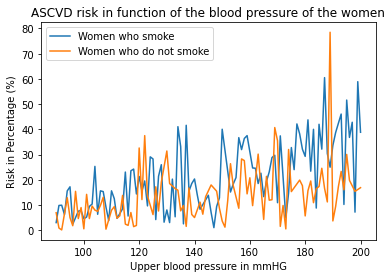

In [18]:
# Let's plot a graph showing the relationship between the blood pressure and the risk
plt.clf()
plt.plot(female_ascvd_smoke.groupby(['Blood_Pressure']).mean()['Risk'], label = 'Women who smoke')
plt.plot(female_ascvd_non_smoke.groupby(['Blood_Pressure']).mean()['Risk'], label = 'Women who do not smoke')
plt.legend()
plt.title("ASCVD risk in function of the blood pressure of the women")
plt.xlabel("Upper blood pressure in mmHG")
plt.ylabel("Risk in Percentage (%)")
plt.show()

This graph is not really relevant, we can not draw conclusion only basing our analysis on the fact someones smoke and has high blood pressure, this graph shows us that we need more information to conclude. So for the next lines of code, I will try to combine the two of them to see if there is any relevant conclusion (assumption that cigarette and diabete taken together can increase the risk).

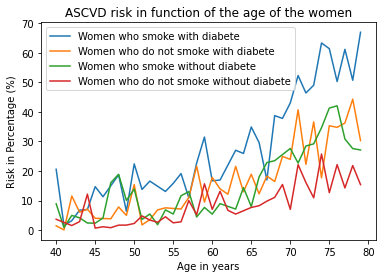

In [19]:
# Trying to create 4 different dataset combining smoking and having diabete
women_smoke_diabete = female_ascvd_smoke[female_ascvd_smoke['Diabete']=='Diabetic']
women_smoke_no_diabete = female_ascvd_smoke[female_ascvd_smoke['Diabete']=='Not Diabetic']
women_no_smoke_diabete = female_ascvd_non_smoke[female_ascvd_non_smoke['Diabete']=='Diabetic']
women_no_smoke_no_diabete = female_ascvd_non_smoke[female_ascvd_non_smoke['Diabete']=='Not Diabetic']

# Let's try to create some plot according to 2 different big factors : diabete and smoking
plt.clf()
plt.plot(women_smoke_diabete.groupby(['Age']).mean()['Risk'], label = 'Women who smoke with diabete')
plt.plot(women_no_smoke_diabete.groupby(['Age']).mean()['Risk'], label = 'Women who do not smoke with diabete')
plt.plot(women_smoke_no_diabete.groupby(['Age']).mean()['Risk'], label = 'Women who smoke without diabete')
plt.plot(women_no_smoke_no_diabete.groupby(['Age']).mean()['Risk'], label = 'Women who do not smoke without diabete')
plt.legend()
plt.title("ASCVD risk in function of the age of the women")
plt.xlabel("Age in years")
plt.ylabel("Risk in Percentage (%)")
plt.show()


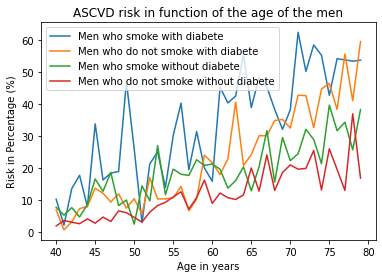

In [20]:
# Trying to create 4 different dataset combining smoking and having diabete
men_smoke_diabete = male_ascvd_smoke[male_ascvd_smoke['Diabete']=='Diabetic']
men_smoke_no_diabete = male_ascvd_smoke[male_ascvd_smoke['Diabete']=='Not Diabetic']
men_no_smoke_diabete = male_ascvd_non_smoke[male_ascvd_non_smoke['Diabete']=='Diabetic']
men_no_smoke_no_diabete = male_ascvd_non_smoke[male_ascvd_non_smoke['Diabete']=='Not Diabetic']

plt.clf()
plt.plot(men_smoke_diabete.groupby(['Age']).mean()['Risk'], label = 'Men who smoke with diabete')
plt.plot(men_no_smoke_diabete.groupby(['Age']).mean()['Risk'], label = 'Men who do not smoke with diabete')
plt.plot(men_smoke_no_diabete.groupby(['Age']).mean()['Risk'], label = 'Men who smoke without diabete')
plt.plot(men_no_smoke_no_diabete.groupby(['Age']).mean()['Risk'], label = 'Men who do not smoke without diabete')
plt.legend()
plt.title("ASCVD risk in function of the age of the men")
plt.xlabel("Age in years")
plt.ylabel("Risk in Percentage (%)")
plt.show()

From observing the two plot from above, we can say that having two factors (smoking and diabete) increase the risk of ASCVD consequently. Having only one factor for women increases the risk but we cannot say which one is the "most relevant" but for men, the interpretation is very clear, diabete is a factor that increase the risk more than smoking.

I will now check if there is any cluster for the observations to support my conclusion.

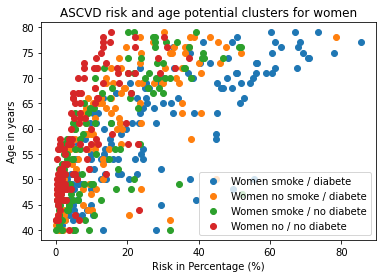

In [21]:
# Let's create a scatter plot to check if there is any clusters (meaning a group of point of the same color / style together)
plt.clf()
plt.scatter(women_smoke_diabete['Risk'], women_smoke_diabete['Age'], label = 'Women smoke / diabete')
plt.scatter(women_no_smoke_diabete['Risk'], women_no_smoke_diabete['Age'], label = 'Women no smoke / diabete')
plt.scatter(women_smoke_no_diabete['Risk'], women_smoke_no_diabete['Age'], label = 'Women smoke / no diabete')
plt.scatter(women_no_smoke_no_diabete['Risk'], women_no_smoke_no_diabete['Age'], label = 'Women no / no diabete')
plt.legend()
plt.title("ASCVD risk and age potential clusters for women")
plt.xlabel("Risk in Percentage (%)")
plt.ylabel("Age in years")
plt.show()

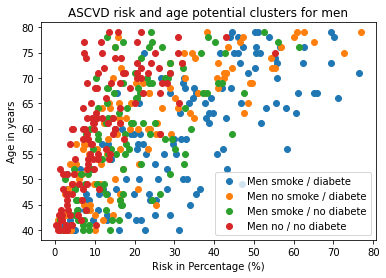

In [22]:
# Let's create a scatter plot to check if there is any clusters for men
plt.clf()
plt.scatter(men_smoke_diabete['Risk'], men_smoke_diabete['Age'], label = 'Men smoke / diabete')
plt.scatter(men_no_smoke_diabete['Risk'], men_no_smoke_diabete['Age'], label = 'Men no smoke / diabete')
plt.scatter(men_smoke_no_diabete['Risk'], men_smoke_no_diabete['Age'], label = 'Men smoke / no diabete')
plt.scatter(men_no_smoke_no_diabete['Risk'], men_no_smoke_no_diabete['Age'], label = 'Men no / no diabete')
plt.legend()
plt.title("ASCVD risk and age potential clusters for men")
plt.xlabel("Risk in Percentage (%)")
plt.ylabel("Age in years")
plt.show()

We can say that the conclusions are pretty much the same as the previous ones, the clusters are the same as the lineplot which is normal since the data used are the same.

In [23]:
# Let's try to compute the mean of the age and risk according to the different factors
# Let's try to compute the mean of the age and risk according to the different factors
print("\nThe average risk for women who smoke and has diabete is : ", str(round(women_smoke_diabete['Risk'].mean(),2)))
print("The average risk for women who don't smoke and has diabete is : ", str(round(women_no_smoke_diabete['Risk'].mean(),2)))
print("The average risk for women who smoke and does not have diabete is : ", str(round(women_smoke_no_diabete['Risk'].mean(),2)))
print("The average risk for women who don't smoke and does not have diabete is : ", str(round(women_no_smoke_no_diabete['Risk'].mean(),2)))
print("\nThe average risk for men who smoke and has diabete is : ", str(round(men_smoke_diabete['Risk'].mean(),2)))
print("The average risk for men who don't smoke and has diabete is : ", str(round(men_no_smoke_diabete['Risk'].mean(),2)))
print("The average risk for men who smoke and does not have diabete is : ", str(round(men_smoke_no_diabete['Risk'].mean(),2)))
print("The average risk for men who don't smoke and does not have diabete is : ", str(round(men_no_smoke_no_diabete['Risk'].mean(),2)))


The average risk for women who smoke and has diabete is :  28.54
The average risk for women who don't smoke and has diabete is :  17.07
The average risk for women who smoke and does not have diabete is :  14.85
The average risk for women who don't smoke and does not have diabete is :  8.19

The average risk for men who smoke and has diabete is :  31.78
The average risk for men who don't smoke and has diabete is :  23.1
The average risk for men who smoke and does not have diabete is :  18.91
The average risk for men who don't smoke and does not have diabete is :  11.9


We can say that being a man can increase the risk of ASCVD because we can see that the average is bigger for every factor and the even the 2nd smallest mean for the men is higher than the 2nd highest mean for the women. We can also say that not smoking and having diabete represent a bigger risk in average than smoking and not having diabete.

Let's show some box plots.


In [24]:
# Boxplot for a better visualisation 
# Creating categories, S defines a smoker and D someone who has diabete
men_smoke_diabete['Category'] = 'S & D'
men_no_smoke_diabete['Category'] = 'No S & D'
men_smoke_no_diabete['Category'] = 'S & No D'
men_no_smoke_no_diabete['Category'] = 'No S & No D'
# Same for women
women_smoke_diabete['Category'] = 'S & D'
women_no_smoke_diabete['Category'] = 'No S & D'
women_smoke_no_diabete['Category'] = 'S & No D'
women_no_smoke_no_diabete['Category'] = 'No S & No D'
# We combine the different datasets in line (not in column)
new_data_men = pd.concat([men_smoke_diabete, men_no_smoke_diabete, men_smoke_no_diabete, men_no_smoke_no_diabete], ignore_index=True)
new_data_women = pd.concat([women_smoke_diabete, women_no_smoke_diabete, women_smoke_no_diabete, women_no_smoke_no_diabete], ignore_index=True)
# Final dataset combining men and women
data_box = pd.concat([new_data_men, new_data_women], ignore_index=True)
# Eliminating the columns that will not be used
data_box = data_box[['Age','Gender','Category','Risk']]

Here, I am creating a dataset that will help me building some boxplots to see the distribution of the variables and the mean risk / average age of the population.

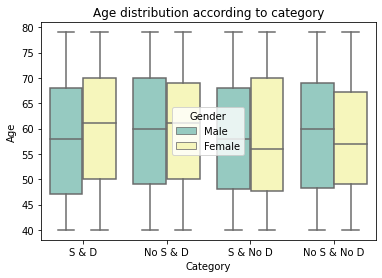

In [25]:
# Age dispersion according to categories
plt.clf()
ax_3 = ax = sns.boxplot(x="Category", y="Age", hue="Gender",data=data_box, palette="Set3")
plt.title("Age distribution according to category")
plt.show()

We can see that for women, non diabetic people tend to be younger whereas for man, the age repartition is pretty much the same, so may be this is why in our conclusion we suggested that men then to be more exposed to risk.


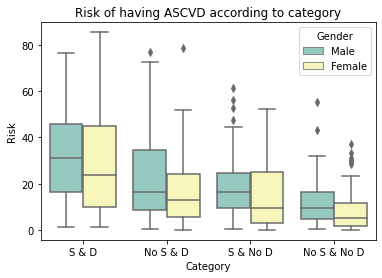

In [26]:
# Risk according to categories
plt.clf()
ax_4 = ax = sns.boxplot(x="Category", y="Risk", hue="Gender",data=data_box, palette="Set3")
plt.title("Risk of having ASCVD according to category")
plt.show()

This box diagram illustrates the conclusions I made thanks to the lineplot and the conclusion we can make out of this diagram is the same as the others I made above. So the age is the first factor that increase the risk of ASCVD, then diabete increase the risk and smoking can make a difference. 

## 5. Exploring the Heart disease dataset
As I finished analyzing the dataset about the risk of ASCVD, I will now focus of a more general case which is having a heart failure according to some factors. 

In [27]:
# Let's print it again in order to show the user an overview of the dataset
print("\nThe following dataset is our second dataset (we can show some relationship between the two) :")
print(heart_diseases_data.head())
# Let's separate the data among male and female
heart_disease_male = heart_diseases_data[heart_diseases_data['Sex']=='M']
heart_disease_female = heart_diseases_data[heart_diseases_data['Sex']=='F']


The following dataset is our second dataset (we can show some relationship between the two) :
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Let's compute the percentage of heart disease among men and women in the dataset and count the number for each gender to avoid statistical bias. 

In [28]:
# Percentage of heart disease recorded according to the gender
print("The percentage of men having a heart disease in this dataset is ", str(round(heart_disease_male['HeartDisease'].value_counts()[1]/len(heart_disease_male)*100,2)),"% out of ", str(len(heart_disease_male)))
print("The percentage of women having a heart disease in this dataset is ", str(round(heart_disease_female['HeartDisease'].value_counts()[1]/len(heart_disease_female)*100,2)),"% out of ", str(len(heart_disease_female)))

The percentage of men having a heart disease in this dataset is  63.17 % out of  725
The percentage of women having a heart disease in this dataset is  25.91 % out of  193


We can say that the among of women is not enough compared to the number of man in this dataset this is why I am choosing to eliminate the records for women in my analysis. I will first recall the correlation matrix to better understand the relation between the variables.

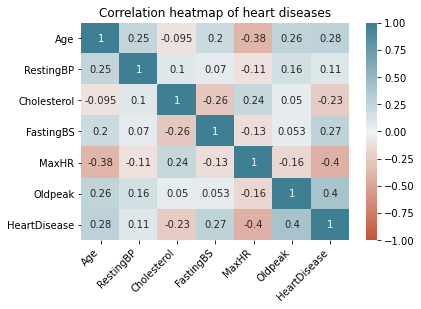

In [29]:
# Let's recall the correlation matrix to better understand the relationship between the variables 
print("")
plt.clf()
correlation_2 = heart_diseases_data.corr()
ax_2 = sns.heatmap(correlation_2, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot=True)
ax_2.set_xticklabels(ax_2.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Correlation heatmap of heart diseases")
plt.show()  

As mentionned above, the variables here are somehow different from the previous ones, but some variables remain in the dataset, for example the age, the cholesterol, the fasting blood sugar (diabete). I will now create several plots to draw my conclusions based on the plots.

<Figure size 432x288 with 0 Axes>

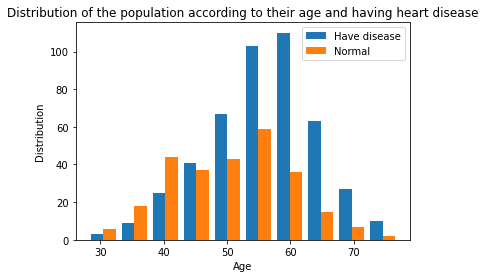

In [30]:
# Let's plot the heart disease according to the different ages (take in account the fact the have heart disease or not)
plt.clf()
fig, ax_5 = plt.subplots()
ax_5.hist([heart_disease_male[heart_disease_male['HeartDisease']==1]['Age'],heart_disease_male[heart_disease_male['HeartDisease']==0]['Age']], label=['Have disease', 'Normal'])
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Distribution of the population according to their age and having heart disease')
plt.legend()
plt.show()

As we can see, before we reach 40 the people are more likely to be healthy and after we reach 40, the people are more likely to have heart disease. So as the previous analysis (4), we can say that the age increase the risk of heart failure.

<Figure size 432x288 with 0 Axes>

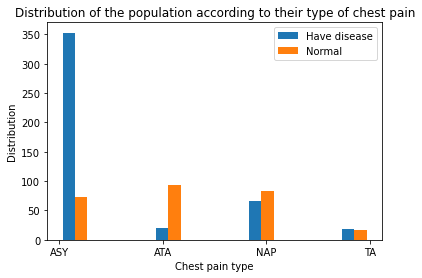

In [31]:
# Chest Pain Type
plt.clf()
fig, ax_6 = plt.subplots()
ax_6.hist([heart_disease_male[heart_disease_male['HeartDisease']==1]['ChestPainType'],heart_disease_male[heart_disease_male['HeartDisease']==0]['ChestPainType']], label=['Have disease', 'Normal'])
plt.xlabel('Chest pain type')
plt.ylabel('Distribution')
plt.title('Distribution of the population according to their type of chest pain')
plt.legend()
plt.show()

We can notice that most of people who have disease have an asymptomatical chest pain, this is why I suggest to people to go to the doctor regularly after they reach 40 because the most of heart disease don't have symptom.

<Figure size 432x288 with 0 Axes>

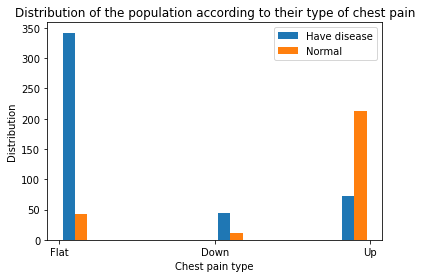

In [32]:
# ST slope
plt.clf()
fig, ax_7 = plt.subplots()
ax_7.hist([heart_disease_male[heart_disease_male['HeartDisease']==1]['ST_Slope'],heart_disease_male[heart_disease_male['HeartDisease']==0]['ST_Slope']], label=['Have disease', 'Normal'])
plt.xlabel('Chest pain type')
plt.ylabel('Distribution')
plt.title('Distribution of the population according to their type of chest pain')
plt.legend()
plt.show()

From this plot, I can draw the conclusion that the normal situation is to have a up oriented ST slope, if it is the contrary or flat, it is important to be careful because the frequency of people who don't have a disease in the sample in those situation is low compared to those who have a disease.

<Figure size 432x288 with 0 Axes>

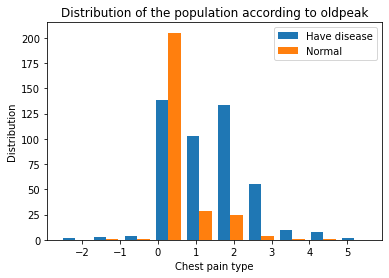

In [33]:
# Oldpeak
plt.clf()
fig, ax_8 = plt.subplots()
ax_8.hist([heart_disease_male[heart_disease_male['HeartDisease']==1]['Oldpeak'],heart_disease_male[heart_disease_male['HeartDisease']==0]['Oldpeak']], label=['Have disease', 'Normal'])
plt.xlabel('Chest pain type')
plt.ylabel('Distribution')
plt.title('Distribution of the population according to oldpeak')
plt.legend()
plt.show()

Having an oldpeak of 1, 2 or 3 can hide a heart disease (it is more likely, since the number of people who don't have disease is low compared to those who are sick).

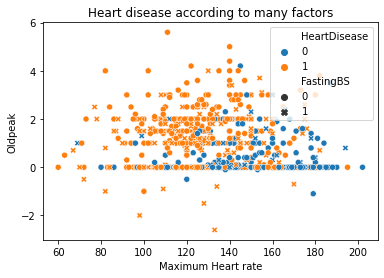

In [34]:
# Try scatterplot to see distribution between blood sugar, max hr and heartdisease
plt.clf()
sns.scatterplot('MaxHR','Oldpeak', data = heart_disease_male, hue ='HeartDisease',style = 'FastingBS')
plt.legend()
plt.title("Heart disease according to many factors")
plt.xlabel("Maximum Heart rate")
plt.ylabel("Oldpeak")
plt.show()

We can clearly see an orange cluster (representing people who have disease) on the middle left part, and they are accentuated when the person has diabete (there are more crosses in orange, in the left part) than blues, and whenthe old peak is low and there is diabete, it is likely to hide a heart disease. Having a low maximum heart rate doesn't benefits to having a heart in good condition and it is worse when the person has diabete.

In [35]:
print('\nThe portion of people with heart disease with FastingBS is ', str(round(len(heart_disease_male[(heart_disease_male['HeartDisease']==1) & (heart_disease_male['FastingBS']==1)])/len(heart_disease_male[heart_disease_male['HeartDisease']==1])*100,2)), "%")
print('The portion of people without heart disease with FastingBS is ', str(round(len(heart_disease_male[(heart_disease_male['HeartDisease']==0) & (heart_disease_male['FastingBS']==1)])/len(heart_disease_male[heart_disease_male['HeartDisease']==0])*100,2)), "%")
print("")



The portion of people with heart disease with FastingBS is  33.62 %
The portion of people without heart disease with FastingBS is  12.73 %



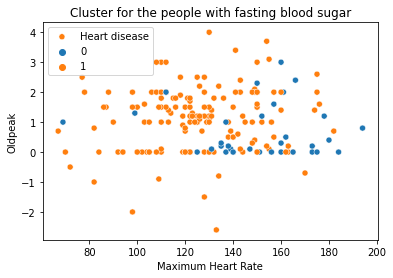

In [36]:
# Show it with a visual representation of what has been mentionned just before
plt.clf()
sns.scatterplot('MaxHR','Oldpeak', data = heart_disease_male[heart_disease_male['FastingBS']==1], hue = 'HeartDisease', label = 'Heart disease')
plt.legend()
plt.title("Cluster for the people with fasting blood sugar")
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Oldpeak")
plt.show()

Since I have only taken in account people who have fasting blood sugar, we can see that there is more orange points than blue so diabete do increase risk of heart disease. There is more orange points in the left than in the right, so low maximum heart rate and fasting blood sugar increase probability of heart disease.
Now I will try to create a dataset with a maximum of heart diseases basing my choices on what have been mentionned. 

In [37]:
# We should see a majority of 1 here by filtering the factors one by one
elderly_man = heart_disease_male[heart_disease_male['Age']>=50]
print("\n# The following dataset contains the records of men older than 50 years old")
print(elderly_man.head(10))
print("# The number of man with heart disease is : ", str(elderly_man['HeartDisease'].value_counts()[1]))
print("# The percentage of person with a heart disease of this dataset is : ", str(round(elderly_man['HeartDisease'].value_counts()[1]/len(elderly_man)*100,2)),"%")


# The following dataset contains the records of men older than 50 years old
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
4    54   M           NAP        150          195          0     Normal   
7    54   M           ATA        110          208          0     Normal   
11   58   M           ATA        136          164          0         ST   
18   60   M           ASY        100          248          0     Normal   
26   53   M           ASY        124          260          0         ST   
27   52   M           ATA        120          284          0     Normal   
29   51   M           ATA        125          188          0     Normal   
30   53   M           NAP        145          518          0     Normal   
31   56   M           NAP        130          167          0     Normal   
32   54   M           ASY        125          224          0     Normal   

    MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
4     122              N      0.0     

In [38]:
elderly_man_asy = elderly_man[elderly_man['ChestPainType']=='ASY']
print("\n# The following dataset contains the records of men older than 50 years old and asymptomatic")
print(elderly_man_asy.head(10))
print("# The number of man with heart disease with asymptomatic pain is : ", str(elderly_man_asy['HeartDisease'].value_counts()[1]))
print("# The percentage of person with a heart disease of this dataset is : ", str(round(elderly_man_asy['HeartDisease'].value_counts()[1]/len(elderly_man_asy)*100,2)),"%")


# The following dataset contains the records of men older than 50 years old and asymptomatic
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
18   60   M           ASY        100          248          0     Normal   
26   53   M           ASY        124          260          0         ST   
32   54   M           ASY        125          224          0     Normal   
36   65   M           ASY        140          306          1     Normal   
50   50   M           ASY        130          233          0     Normal   
58   54   M           ASY        150          365          0         ST   
59   52   M           ASY        112          342          0         ST   
68   52   M           ASY        160          246          0         ST   
72   52   M           ASY        120          182          0     Normal   
74   55   M           ASY        140          268          0     Normal   

    MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
18    125            

In [39]:
elderly_man_sy_flat_down = elderly_man_asy[(elderly_man_asy['ST_Slope']=='Flat') | (elderly_man['ST_Slope']=='Down')]
print("\n# The following dataset contains the records of men older than 50 years old and asymptomatic with flat ST slope or downward")
print(elderly_man_sy_flat_down[['Age','Oldpeak','MaxHR','FastingBS','HeartDisease']].head(10))
print("# The percentage of person with a heart disease of this dataset is : ", str(round(elderly_man_sy_flat_down['HeartDisease'].value_counts()[1]/len(elderly_man_sy_flat_down)*100,2)),"%")


# The following dataset contains the records of men older than 50 years old and asymptomatic with flat ST slope or downward
    Age  Oldpeak  MaxHR  FastingBS  HeartDisease
18   60      1.0    125          0             1
26   53      3.0    112          0             0
32   54      2.0    122          0             1
36   65      1.5     87          1             1
50   50      2.0    121          0             1
59   52      1.0     96          0             1
68   52      4.0     82          0             1
72   52      0.0    150          0             1
74   55      1.5    128          0             1
82   63      0.0    115          0             1
# The percentage of person with a heart disease of this dataset is :  94.29 %


In conclusion, we can say that being more than 50, having asymptomatic chest pain, and having a flat or a downward ST Slope, are the factors that can increase the probability of heart disease (The probability here is 94%), so the conclusion is pretty much true for the data set I am using.

## 6. Bonus part implementing machine learning 
### a. Linear model

As I showed you the different factors that can increase the risk of ASCVD and the probability of having a heart disease, I can create some model to see if the machine agrees with the conclusions that have been made. I will start with a simple linear regression, then a multiple regression and 2 decision trees.

In [40]:
# First part with linear regression start with the age
average_risk_age =  relevant_ascvd.groupby(['Age']).mean()['Risk']
average_risk_age = average_risk_age.reset_index()
# Fitting the model
X_age = average_risk_age['Age'].values.reshape(-1,1)
y_risk = average_risk_age['Risk'].values
ols_risk_age = linear_model.LinearRegression()
model_1 = ols_risk_age.fit(X_age, y_risk)
response_risk = model_1.predict(X_age)
r2 = model_1.score(X_age, y_risk)

Now that the model has been created, I can plot the response and see if there is any difference between the model and the actual values (named y_risk).

<Figure size 432x288 with 0 Axes>

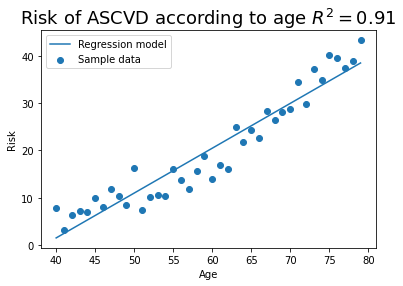

In [41]:
# Plotting the comparison between the actual values and the predicted values
plt.clf()
fig, ax_9 = plt.subplots()
ax_9.plot(X_age, response_risk, label='Regression model')
ax_9.scatter(X_age, y_risk, label='Sample data')
ax_9.set_title('Risk of ASCVD according to age $R^2= %.2f$' % r2, fontsize=18)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Risk")
plt.show()

In [42]:
print('Goodness of the fit ', str(round(r2*100,2)), "%")
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)

Goodness of the fit  90.97 %
intercept: -36.418601400460574
slope: [0.94809727]


I can say that the model is really well fitted according to the actual values and the slope is strong it means that when the age grows by 1, the risk can grow by 0.94% in average.

Text(0.5, 0.92, 'Risk according to age and blood pressure : Average vs predicted')

<Figure size 432x288 with 0 Axes>

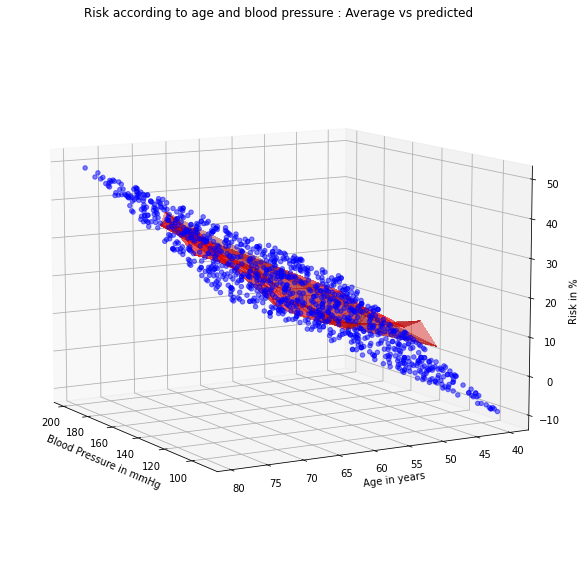

In [43]:
# Risk according to age and blood pressure (multiple linear regression)
X_age_bp = relevant_ascvd[['Age', 'Blood_Pressure']].values.reshape(-1,2)
y_risk2 = relevant_ascvd[['Risk']].values
# Fitting the model 
ols_double = linear_model.LinearRegression()
model_2 = ols_double.fit(X_age_bp, y_risk2)
response_risk2 = model_2.predict(X_age_bp)
# Plotting the multi linear regression according to blood pressure and age
plt.clf()
fig = plt.figure(figsize=(20,10))
ax_10 = fig.add_subplot(111, projection='3d')
ax_10.scatter(relevant_ascvd['Blood_Pressure'], relevant_ascvd['Age'], response_risk2, c='blue', marker='o', alpha=0.5, label = 'Predicted') 
ax_10.plot_trisurf(relevant_ascvd.groupby(['Age']).mean()['Blood_Pressure'], average_risk_age['Age'], average_risk_age['Risk'], color='red', alpha=0.4,antialiased=False, label = 'Average value')
ax_10.set_xlabel("Blood Pressure in mmHg")
ax_10.set_ylabel("Age in years")
ax_10.set_zlabel("Risk in %")
ax_10.view_init(10,150)
plt.title("Risk according to age and blood pressure : Average vs predicted")

We can see that the actual average value (in red) does reach the predicted value (blue), but it depends, of course on the view of the machine. For this view, it seems to be relevant.
I will now move on to the regression trees.
### b. Decision Trees
Decisions trees are useful for classifications problems because according to a factor they can find the right classification, we go to right when the assumption is false and we go to left when it is true. I have done it for the two datasets and the deeper the color, the strong the result but we have to take the samples that are relevant.

In [44]:
# Regression trees
# Starting with risk of ASCVD 
# I should turn the qualitative variables into quantitative variables
relevant_numeric = relevant_ascvd[['Age','Blood_Pressure']]
relevant_numeric['Gender'] = relevant_ascvd['Gender'].replace({"Female" : 0, "Male" : 1}, inplace=False)
relevant_numeric['Diabete'] = relevant_ascvd['Diabete'].replace({"Not Diabetic" : 0, "Diabetic" : 1}, inplace=False)
relevant_numeric['Smoker'] = relevant_ascvd['Smoker'].replace({"No" : 0, "Yes" : 1}, inplace=False)

# Separate the result into classes
relevant_numeric.loc[relevant_ascvd['Risk'] >= 45, 'Risk_cat'] = 'Yes'
relevant_numeric.loc[relevant_ascvd['Risk'] < 45, 'Risk_cat'] = 'No'
# Separating the regressand and the regressors
X_tree_ascvd = relevant_numeric.loc[:, relevant_numeric.columns != 'Risk_cat']
Y_tree_ascvd = relevant_numeric['Risk_cat']
# Fitting the model
tree_model = tree.DecisionTreeClassifier(max_depth = 4)
tree_fitted_1 = tree_model.fit(X_tree_ascvd, Y_tree_ascvd)

# Showing the regression tree for the ASCVD risk
plt.clf()
fig, ax_11 = plt.subplots(nrows = 1,ncols = 1, figsize = (40,20), dpi=400) 
tree.plot_tree(tree_fitted_1,feature_names = X_tree_ascvd.columns,class_names=Y_tree_ascvd.unique(), filled = True, fontsize = 18)
plt.title("Decision Tree about having a high risk of ASCVD", fontsize=30)
plt.show()

<Figure size 432x288 with 0 Axes>

The conclusion we can make is that :
1. being more than 70, no diabete, blood pressure higher than 177, smoking
2. being between 62 and 70, and high bloog pressure with diabete

Can be factor that are determinant to have a high risk of ASCVD.

In [45]:
# Heart disease dataset 
# Let's make the qualitative variables qualitative
heart_disease_tree = heart_diseases_data[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']]
heart_disease_tree['ST_RestingECG'] = heart_diseases_data['RestingECG'].replace({'LVH':-1,'Normal':0,'ST':1}, inplace = False)
heart_disease_tree['ST_Slope'] = heart_diseases_data['ST_Slope'].replace({'Down':-1,'Flat':0,'Up':1}, inplace = False)
heart_disease_tree['Exercise'] = heart_diseases_data['ExerciseAngina'].replace({'N':0,'Y':1}, inplace = False)
heart_disease_tree['Gender'] = heart_diseases_data['Sex'].replace({'F':0,'M':1}, inplace = False)
heart_disease_tree['HeartDisease'] = heart_diseases_data['HeartDisease'].replace({1:'Yes',0:'No'}, inplace = False)
# Separating the regressors and the regressand
X_tree_disease = heart_disease_tree.loc[:,heart_disease_tree.columns != 'HeartDisease']
Y_tree_disease = heart_disease_tree['HeartDisease']
# Fitting the model
tree_model = tree.DecisionTreeClassifier(max_depth = 4)
tree_fitted_2 = tree_model.fit(X_tree_disease, Y_tree_disease)

# Showing the plot of the tree
plt.clf()
fig, ax_12 = plt.subplots(nrows = 1,ncols = 1, figsize = (50,20), dpi=400) 
tree.plot_tree(tree_fitted_2,feature_names = X_tree_disease.columns, class_names = Y_tree_disease.unique(), filled = True, fontsize = 18)
plt.title("Decision Tree about having a heart disease", fontsize=30)
plt.show()

<Figure size 432x288 with 0 Axes>

According to this tree, the conclusions we can make are the following :
1. Having flat or down ST_Slope, HR lower than 150, having resting bp higher than 131 for women and 86 for men can hide heart disease
2. Having flat or down ST_Slope, HR lower than 150, and MaxHR lower than 183 but higher than 150
3. Having Normal slope, cholesterol lower than 42, and fasting blood sugar (diabete)

Are the main factors that can to heart disease.

### c. Let's invite the user to put their input themselves
As I created some models, we can let the user play with the model and allow them to see how some factors could affect their risk of having a heart disease and in a particular case, ASCVD.

In [57]:
# Example
sg.theme('BlueMono')

# Layout window
layout = [  [sg.Text('============== Input  Zone ==============')],
            [sg.Text('This simulator helps estimate the risk of ASCVD, \naccording to the input the program will tell if \nthe patient is likely to have ASCVD :\n')],
            [sg.Text('Age (years) :                   '), sg.InputText("50",key="_age_")],
            [sg.Text('Blood Pressure (mmHg) : '), sg.InputText("100",key="_bp_")],
            [sg.Text('Gender (1 for M / 0 for F) :'), sg.InputText("1",key="_gender_")],
            [sg.Text('Diabete (1 for Y / 0 for N) :'), sg.InputText("1",key="_diabete_")],
            [sg.Text('Smoker (1 for Y / 0 for N) :'), sg.InputText("1",key="_smoke_")],
            [sg.Text('')],
            [sg.Button('Start simulation')],
            [sg.Text('')],
            [sg.Text('============== Output Zone ==============')],
            [sg.Text('')],
            [sg.Text('Response :'),sg.Text('',key='_response_')],
            [sg.Text('')],
            [sg.Text('=========================================')],
            [sg.Button('Exit')] ]
window = sg.Window('ASCVD Risk Simulator', layout, size=(330,500))

while True: 
    my_window=window.read()
    event=my_window[0]
    values=my_window[1]
    error = 0
    # If we press exit or close the window, we exit the loop (It will not be displayed anymore)
    if event is None or event == 'Exit':
        break
    # If we press the button "Start simulation"
    elif event == 'Start simulation':
        # We have to make sure that every input can be converted to floats or integer
        try :
            age = float(values['_age_'])
        except ValueError:
            window.Element('_age_').update(value = "NOT A NUMBER")
            error = 1
        try :
            blood_pressure = float(values['_bp_'])
        except ValueError:
            window.Element('_bp_').update(value = "NOT A NUMBER")
            error = 1
        try :
            gender = int(values['_gender_'])
            if (gender != 0) and (gender != 1):
                # If the input is different from 0 or 1
                window.Element('_gender_').update(value = "INVALID INPUT")
                error = 1
        except ValueError:
            window.Element('_gender_').update(value = "NOT A NUMBER")
            error = 1
        try :
            diabete = int(values['_diabete_'])
            # If the input is different from 0 or 1
            if (diabete != 0) and (diabete != 1):
                window.Element('_diabete_').update(value = "INVALID INPUT")
                error = 1
        except ValueError:
            window.Element('_diabete_').update(value = "NOT A NUMBER")
            error = 1
        try :
            smoke = int(values['_smoke_'])
            if (smoke != 0) and (smoke != 1):
                window.Element('_smoke_').update(value = "INVALID INPUT")
                error = 1
        except ValueError:
            window.Element('_smoke_').update(value = "NOT A NUMBER")
            error = 1
        if error == 1:
            # Return to the beginning of the loop
            continue
        
        # Computation zone
        # Create a dataframe
        input_x = pd.DataFrame([age, blood_pressure, gender, diabete, smoke]).transpose()
        prediction = tree_fitted_1.predict(input_x)
        
        window.Element('_response_').update(value = str(prediction[0]))

# At the end we close the window
window.close()

This program and user interface may allow the user to check what result they can get regarding ascvd by inputting different values of variables. So they can better understand the impact of each variable. Of course, the value of the input are verified and the user has to put the right format if they want to use the program. This will avoid errors.

## Conclusion
The machine learning part is in phase with the things we said above and in conclusion, we can say that the variables that impact the health of the heart are of course the age, the fact of having diabete, smoking in someways, having a flat or downward ST Slope, and having a limited MaxHR (which means that the heart in not in capacity to beat as fast as other people). Since the chest pain are often asymptomatic (as we ween before), I can only suggest to people to do get checked on a regular basis (once a year).